<a href="https://colab.research.google.com/github/951237/TIL/blob/master/201013_TIL_%EC%8B%9C%EA%B3%84%EC%97%B4_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0_fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 배추가격 예상하기 feat fbprophet 
- 배추가격의 주기를 이용하여 데이터 예측


In [37]:
import pandas as pd
from fbprophet import Prophet
import numpy as np
import matplotlib.pyplot as plt

In [51]:
# 데이터 프레임 기본 정보 출력
def get_info(df):
    print(df.shape, '\n')
    print(df.head(), '\n')
    print(df.tail(), '\n')
    print(df.dtypes)

In [66]:
PATH_FILE = "/content/drive/My Drive/data/배추가격예측하기_배추가격 및 기온정보/배추가격_데이터_예제_price data.csv의 사본"

# 데이터 불러오기
df = pd.read_csv(PATH_FILE)

# 날짜로 선언하기
df['year'] = pd.to_datetime(df['year'], format='%Y%m%d')

In [92]:
# 데이터 프레임에서 날짜와 가격정보만으로 데이터 프레임 생성
# df_fc = pd.DataFrame({'ds' : df['year'], 'y' : df['avgPrice']})
df_trunc = df[['year', 'avgPrice']]

In [97]:
df_trunc['year'][:16-05-31]

SyntaxError: ignored

In [93]:
# 훈련데이터 생성하기
df_fc['ds'][:2014-6-31]

0      2010-01-01
1      2010-01-02
2      2010-01-03
3      2010-01-04
4      2010-01-05
          ...    
1972   2015-05-27
1973   2015-05-28
1974   2015-05-29
1975   2015-05-30
1976   2015-05-31
Name: ds, Length: 1977, dtype: datetime64[ns]

In [40]:
# 주기를 1년으로 알림.
m = Prophet(yearly_seasonality=True)
m.fit(df_fc); # 훈련시키기

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [47]:
# 예측하기 
future = m.make_future_dataframe(periods = 360) # 기간설정하기
forecast = m.predict(future) # 예측 실행하기 

In [ ]:
# 결과 그래프로 표시하기
m.plot(forecast)

In [ ]:
# 세부항목 그래프로 표시
m.plot_components(forecast)

# 코딩 연습장

In [71]:
get_info(df_test)

(1973,) 

0   2010-01-01
1   2010-01-02
2   2010-01-03
3   2010-01-04
4   2010-01-05
Name: ds, dtype: datetime64[ns] 

1968   2015-05-23
1969   2015-05-24
1970   2015-05-25
1971   2015-05-26
1972   2015-05-27
Name: ds, dtype: datetime64[ns] 

datetime64[ns]


In [91]:
df_trunc = df[['year', 'avgPrice']]

In [90]:
get_info(df)

(2922, 6) 

        year  avgTemp  minTemp  maxTemp  rainFall  avgPrice
0 2010-01-01     -4.9    -11.0      0.9       0.0      2123
1 2010-01-02     -3.1     -5.5      5.5       0.8      2123
2 2010-01-03     -2.9     -6.9      1.4       0.0      2123
3 2010-01-04     -1.8     -5.1      2.2       5.9      2020
4 2010-01-05     -5.2     -8.7     -1.8       0.7      2060 

           year  avgTemp  minTemp  maxTemp  rainFall  avgPrice
2917 2017-12-27     -3.9     -8.0      0.7       0.0      2865
2918 2017-12-28     -1.5     -6.9      3.7       0.0      2884
2919 2017-12-29      2.9     -2.1      8.0       0.0      2901
2920 2017-12-30      2.9     -1.6      7.1       0.6      2901
2921 2017-12-31      2.1     -2.0      5.8       0.4      2901 

year        datetime64[ns]
avgTemp            float64
minTemp            float64
maxTemp            float64
rainFall           float64
avgPrice             int64
dtype: object


In [19]:
time = np.arange(0, len(df))
price = df['avgPrice'].values

fx = np.linspace(0, time[-1], 1000)

In [21]:
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [22]:
fp1 = np.polyfit(time, price, 1)
f1 = np.poly1d(fp1)

fp2 = np.polyfit(time, price, 2)
f2 = np.poly1d(fp2)

fp3 = np.polyfit(time, price, 3)
f3 = np.poly1d(fp3)

fp15 = np.polyfit(time, price, 15)
f15 = np.poly1d(fp15)

print(error(f1, time, price))
print(error(f2, time, price))
print(error(f3, time, price))
print(error(f15, time, price))

1368.1063021406999
1265.96445037655
1265.3260005179134
1015.208082282136


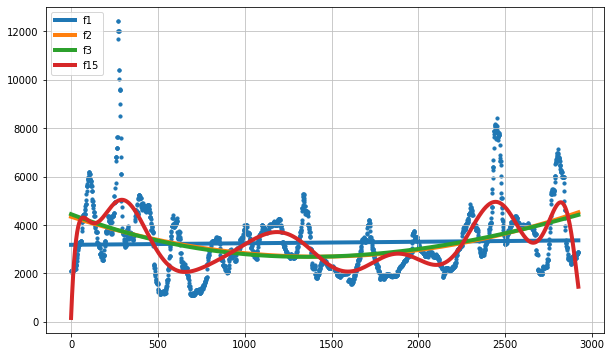

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(time, price, s=10)

plt.plot(fx, f1(fx), lw = 4, label='f1')
plt.plot(fx, f2(fx), lw = 4, label='f2')
plt.plot(fx, f3(fx), lw = 4, label='f3')
plt.plot(fx, f15(fx), lw = 4, label='f15')

plt.grid(True, linestyle='-', color = '0.75')
plt.legend(loc=2)
plt.show()